In this notebook, we analyse the percentage of people in the area living households with no central heating. We will show that while the number of people without central heating in the local area is fairly typical for Wales, that the older people in the area are far more likely than other older people around Wales to not have central heating. This is partly due to the relatively small number of older people in the area though. 

This data comes from https://statswales.gov.wales/Catalogue/Community-Safety-and-Social-Inclusion/Welsh-Index-of-Multiple-Deprivation/WIMD-Indicator-Data-By-Age/nocentralheating

In [1]:
import numpy as np
import pandas as pd

These are the LSOA codes for the areas we are interested in.

In [2]:
grangetown_codes = ['W01001759','W01001760','W01001761','W01001762','W01001764','W01001765',\
                    'W01001766','W01001767','W01001768','W01001946']
canton_codes = ['W01001709', 'W01001710', 'W01001711', 'W01001712', 'W01001713', 'W01001714',\
                'W01001715', 'W01001716', 'W01001717'] 
riverside_codes = ['W01001855', 'W01001856', 'W01001857', 'W01001862']
lsoa_codes = np.concatenate([grangetown_codes, canton_codes, riverside_codes]) 

Load the data, give the columns more useful names, strip the whitespace from the names and codes, and use the code as the index. Finally we add a column which indicates if the LSOA is a local one or not.

In [3]:
file = 'no_central_heating.csv'
data = pd.read_csv(file,skiprows=6)
data = data.rename(columns={'Unnamed: 0': 'LSOA name', 'Unnamed: 1': 'LSOA code'})
data['LSOA name'] =  list(map(lambda lsoa_name : lsoa_name.strip(), data['LSOA name']))
data['LSOA code'] =  list(map(lambda lsoa_code : lsoa_code.strip(), data['LSOA code']))
data = data.set_index('LSOA code')
data['local'] = list(map(lambda lsoa : int(np.isin(lsoa,lsoa_codes)), data.index.values))

This is a function for plotting the above data, separating out the local and non-local LSOAs. It can also pick out local LSOAs in the top nth percentiles, using the percentile option. To find LSOAs in the bottom nth percentile, use percentile = -n. Percentile option only works if plotting a bar chart. The bar chart will plot the top or bottom n percentiles of the LSOAs.

In [4]:
def plot_two_data_sets(stat,data,stat2=None,kind='bar',figsize=(15,7),percentile=10.0): 
    if kind == 'bar':
        percentile/=100.
        order = data[stat].dropna().sort_values().keys()
        lnl_data = pd.concat([data[data['local']==True][stat],data[data['local']==False][stat]],\
                                                             axis=1,keys=['local','non-local'])
        if percentile>0:
            lnl_data.set_index(lnl_data.index.values).loc[order[-int(len(data)*percentile):]].plot(\
                                                                kind=kind,title=stat,figsize=figsize)
            return [code for code in order[-int(len(data)*percentile):] if data['local'][code]==True ]
        else:
            lnl_data.set_index(lnl_data.index.values).loc[order[:-int(len(data)*percentile)]].plot(\
                                                                kind=kind,title=stat,figsize=figsize)
            return [code for code in order[:-int(len(data)*percentile)] if data['local'][code]==True ]

    elif kind == 'scatter':
        data.plot.scatter(x=stat, y=stat2,c='local',colormap='viridis',figsize=figsize)
    else:
        lnl_data = pd.concat([data[data['local']==True][stat],data[data['local']==False][stat]],\
                             axis=1,keys=['local','non-local'])
        lnl_data.plot(kind=kind,title=stat,figsize=figsize)


We begin by looking at the top percentile of LSOAs and the top decile of LSOAs for percentage of people living in households without central heating. The data is broken down by age group. We can see that the older people in the local area are more likely than people in the same age in other parts of Wales to not have central heating.

In [5]:
top_1pc_local = {}
for stat in data.drop(columns=['LSOA name', 'local','0- 15 ', '0 - 18 ', '16 - 64 ', '65+ ']).keys():
    top_1pc_local[stat] = plot_two_data_sets(stat=stat,data=data,kind='bar',percentile=1.0)

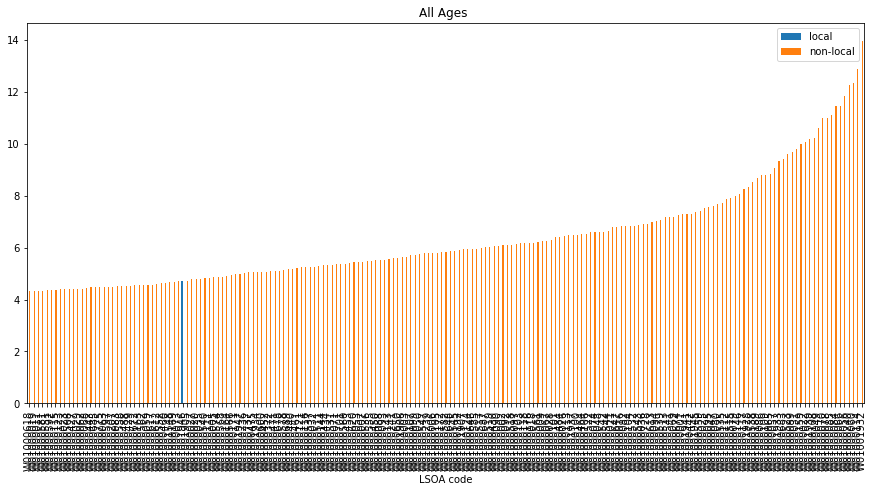

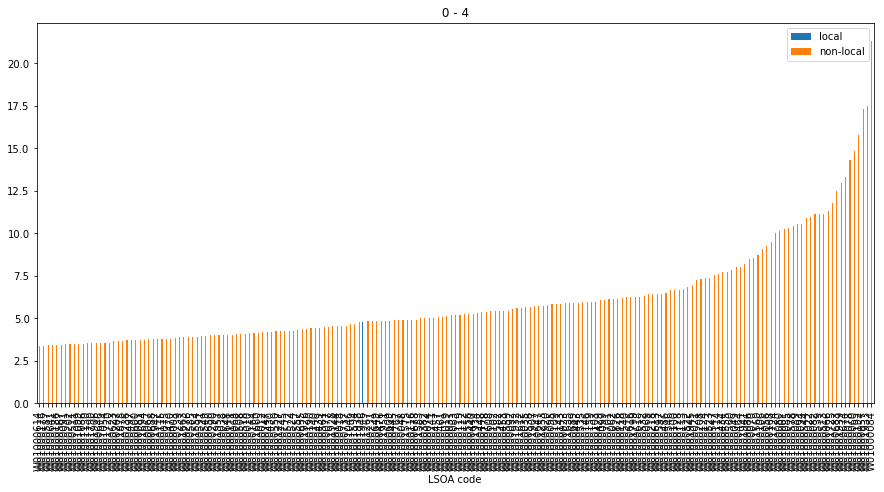

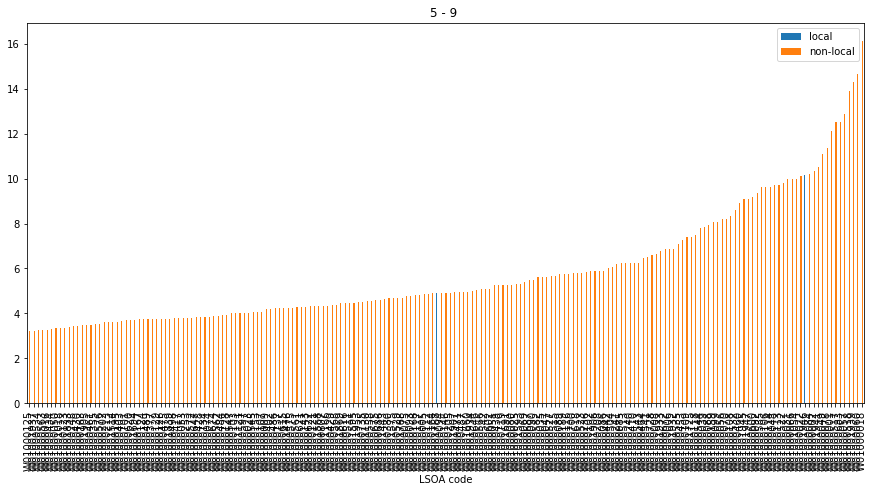

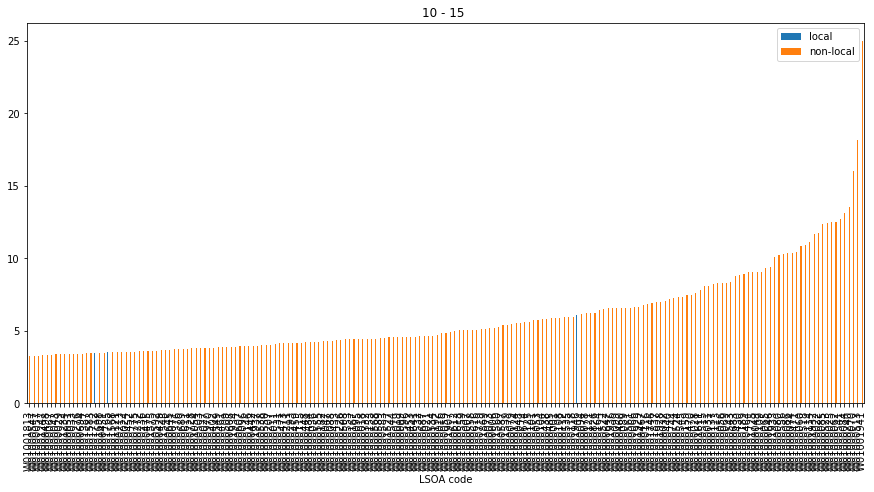

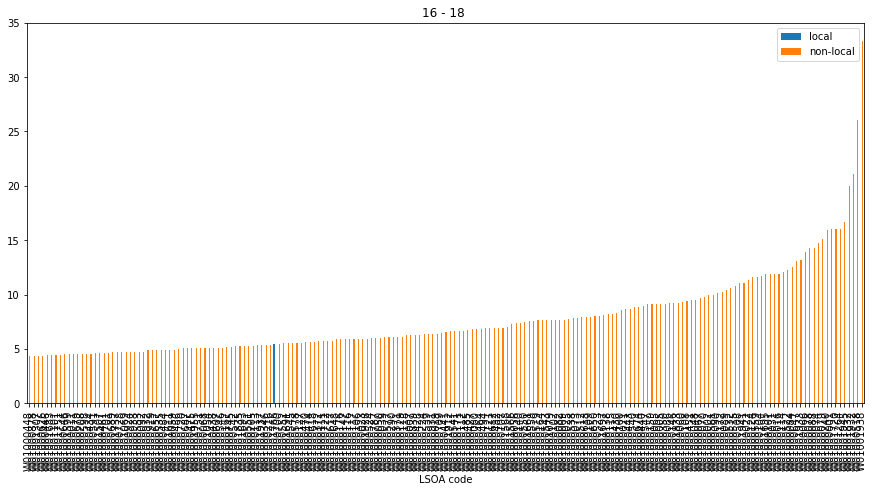

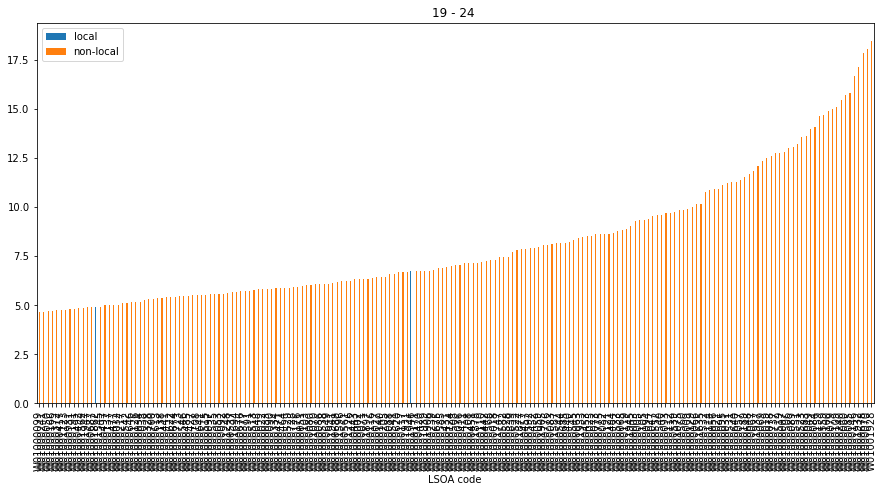

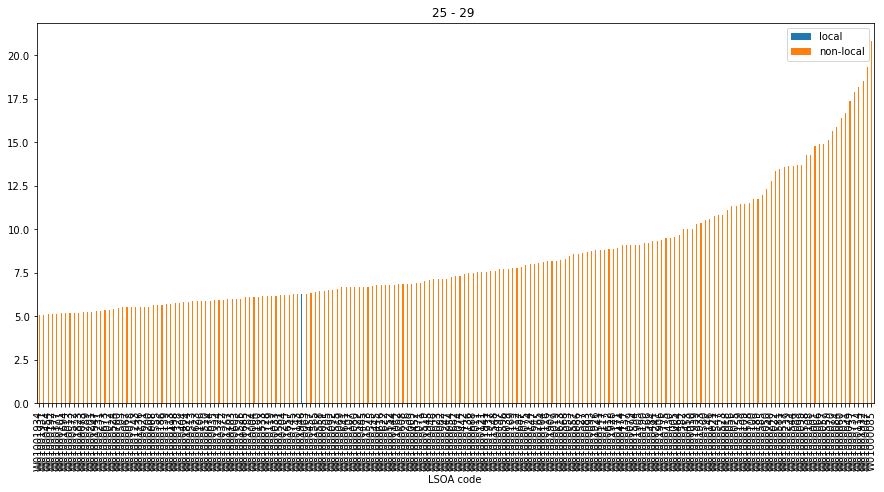

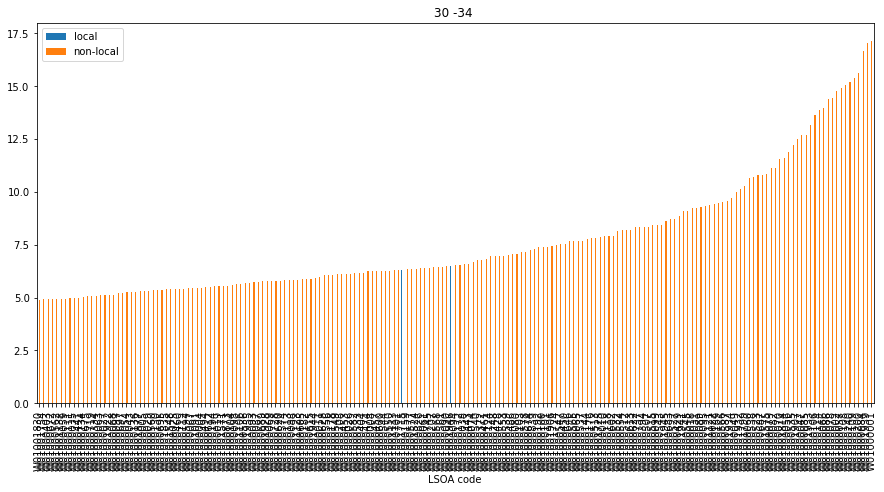

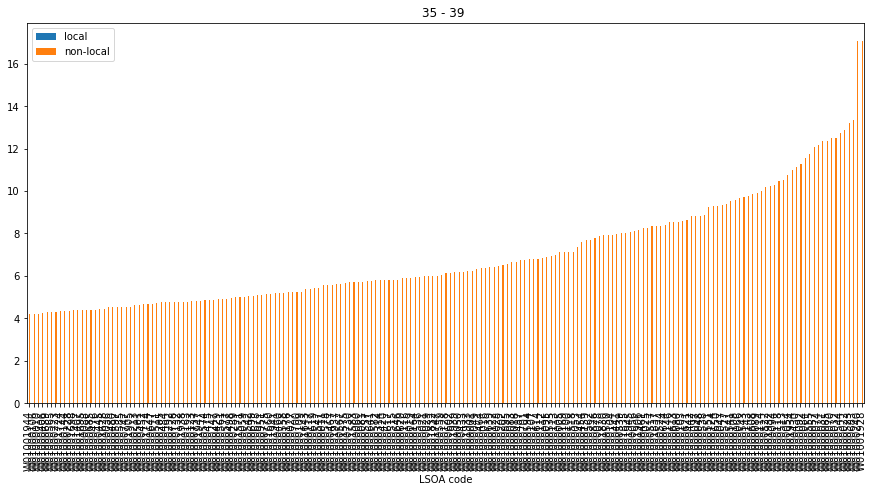

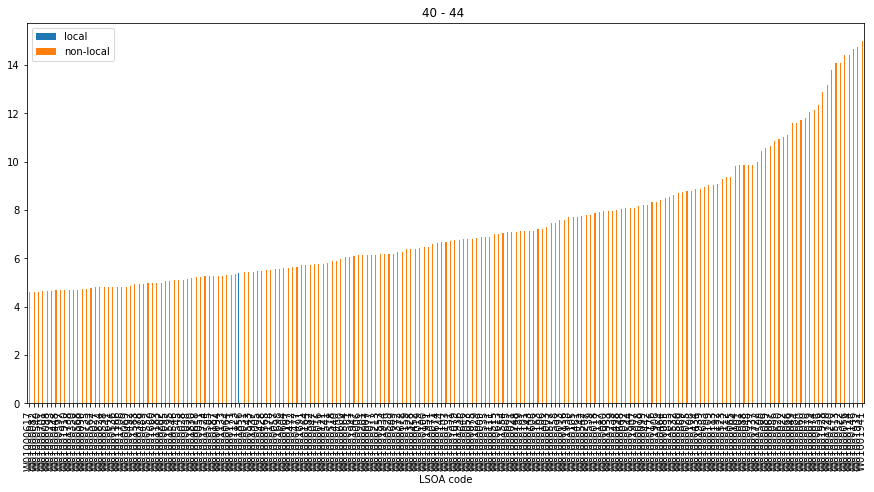

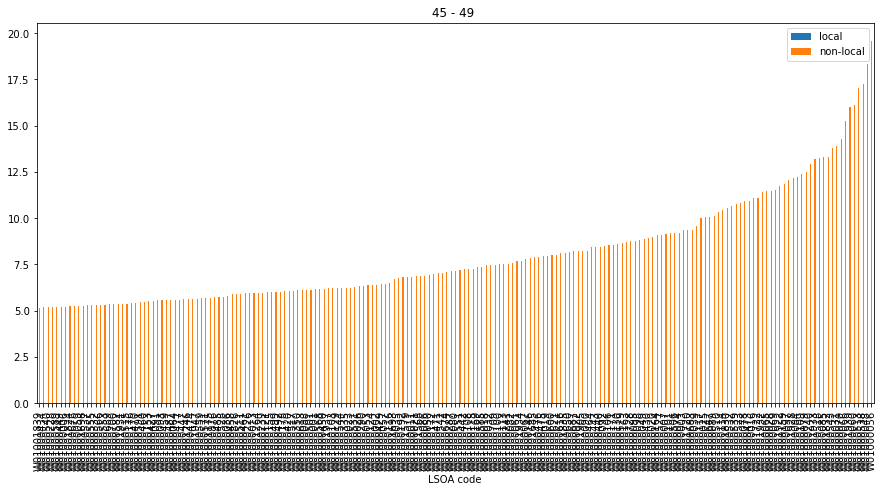

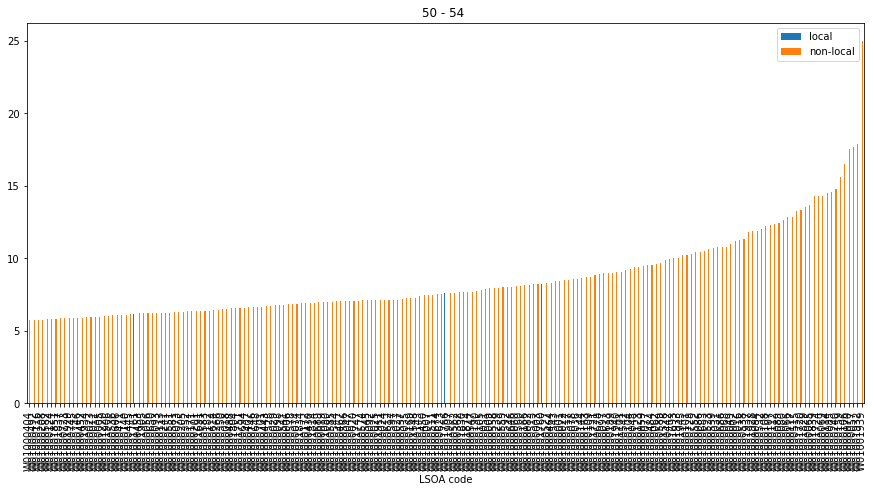

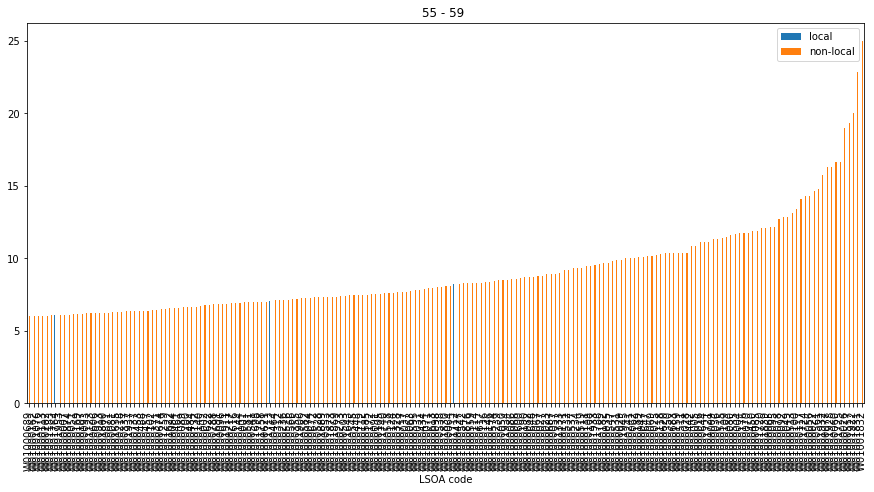

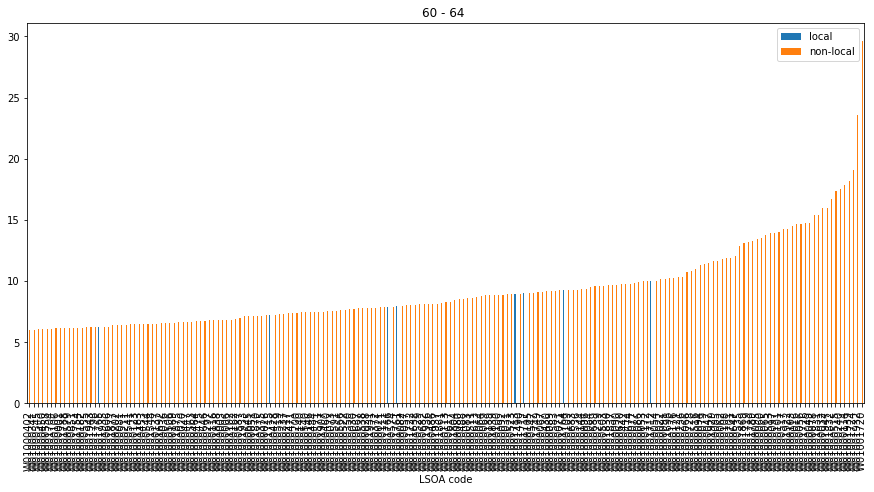

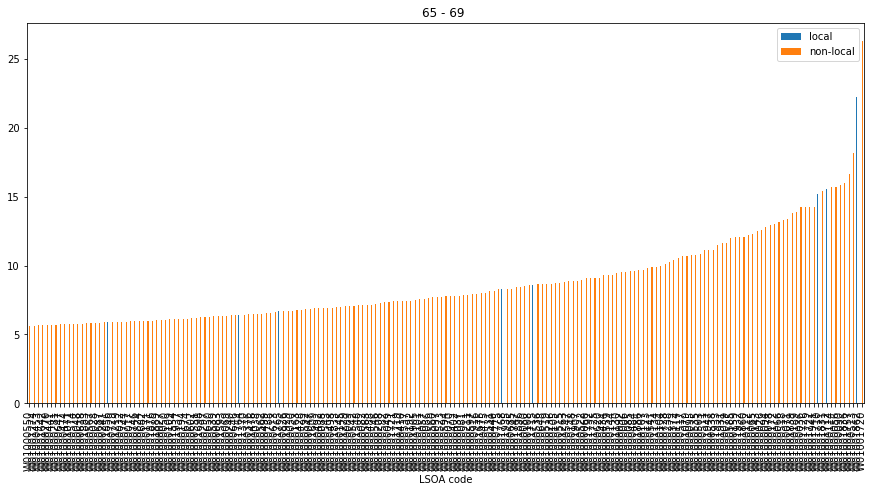

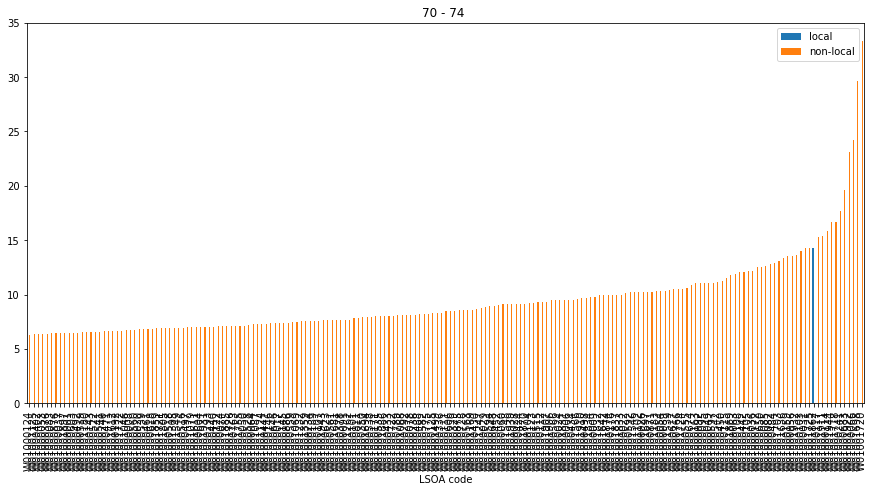

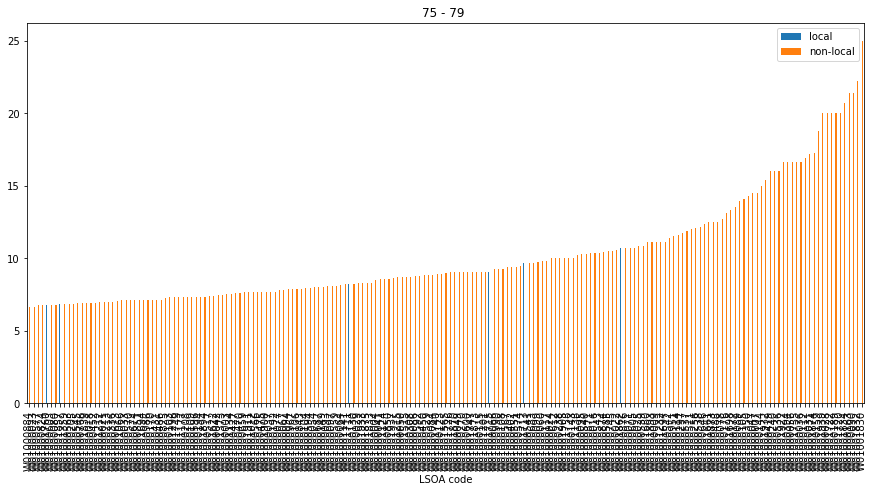

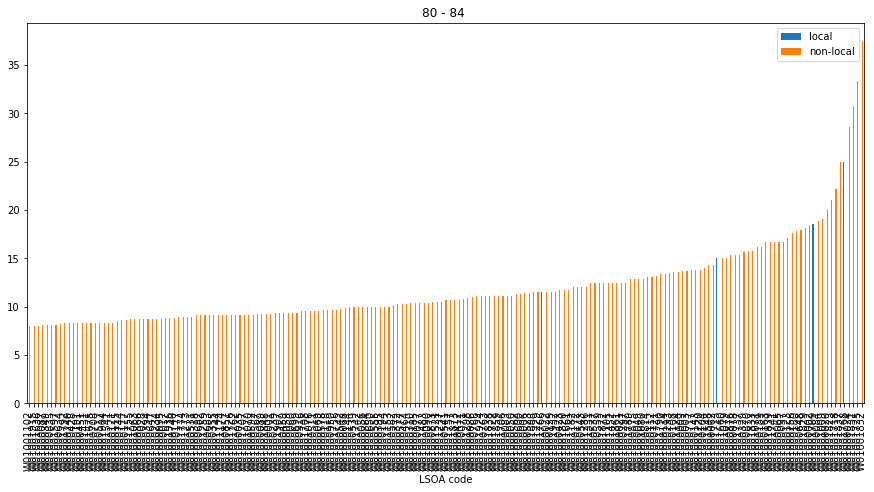

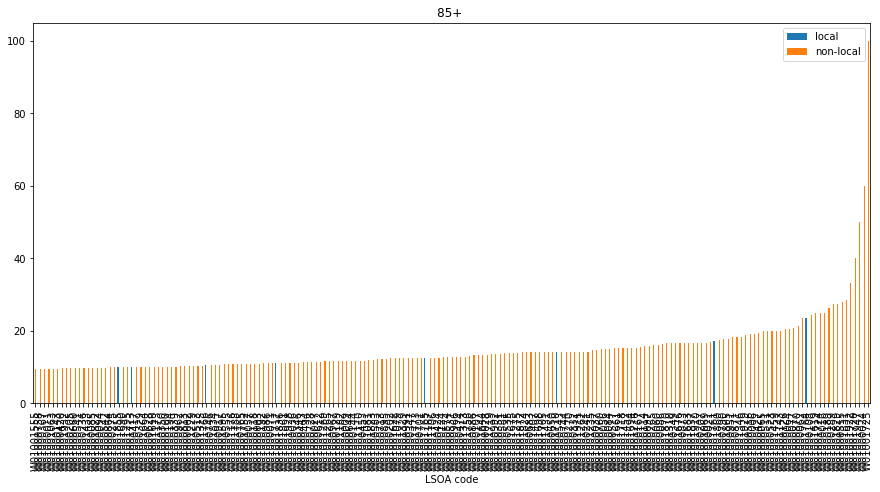

In [6]:
top_10pc_local = {}
for stat in data.drop(columns=['LSOA name', 'local','0- 15 ', '0 - 18 ', '16 - 64 ', '65+ ']).keys():
    top_10pc_local[stat] = plot_two_data_sets(stat=stat,data=data,kind='bar',percentile=10.0)

Below we count the number of local LSOAs in the top decile or percentile of LSOAs in Wales for no central heating. We then plot the results. This shows more clearly that the older local people are more likely to not have central heating than people in the same age group from other parts of Wales. 

In [7]:
top_10pc_count = {key : len(top_10pc_local[key]) for key in top_10pc_local.keys()}
top_1pc_count = {key : len(top_1pc_local[key]) for key in top_1pc_local.keys()}
top_10pc_count_df = pd.DataFrame.from_dict(top_10pc_count, orient='index')
top_1pc_count_df = pd.DataFrame.from_dict(top_1pc_count, orient='index')
top_1_10_pc_df = pd.concat([top_10pc_count_df,top_1pc_count_df],axis=1,keys=['10 pc','1 pc'])
top_1_10_pc_df

,10 pc,1 pc
,0,0
All Ages,1,0
0 - 4,1,0
5 - 9,2,1
10 - 15,3,0
16 - 18,1,0
19 - 24,2,0
25 - 29,1,0
30 -34,2,0
35 - 39,0,0


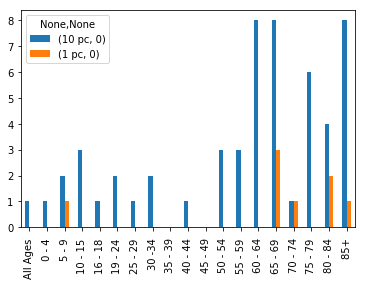

In [8]:
top_1_10_pc_df.plot(kind='bar')

Below are box plots to allow us to see the whole distribution and not just the extreme values. This shows that older people in the local area are more likely to not have cantral heating.

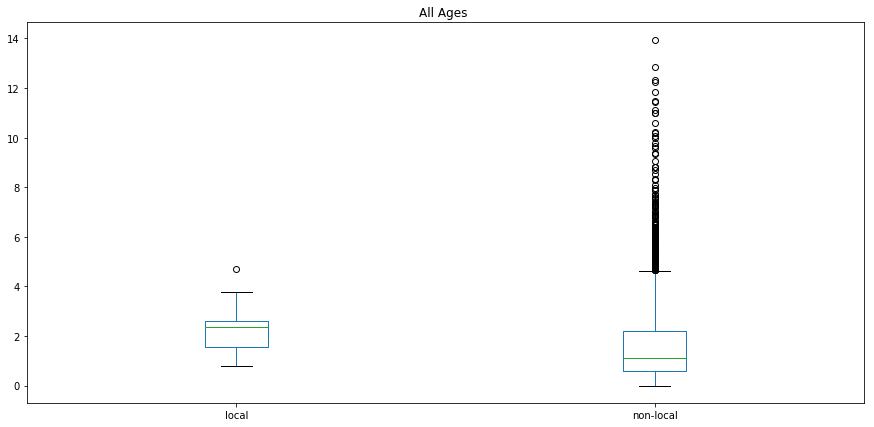

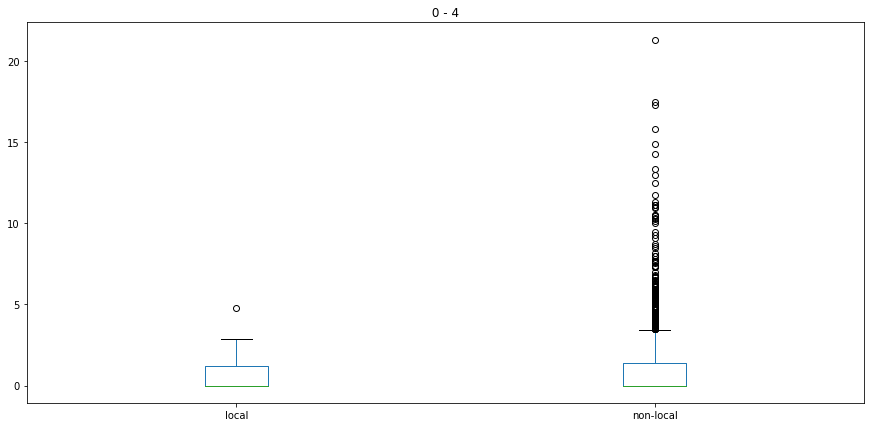

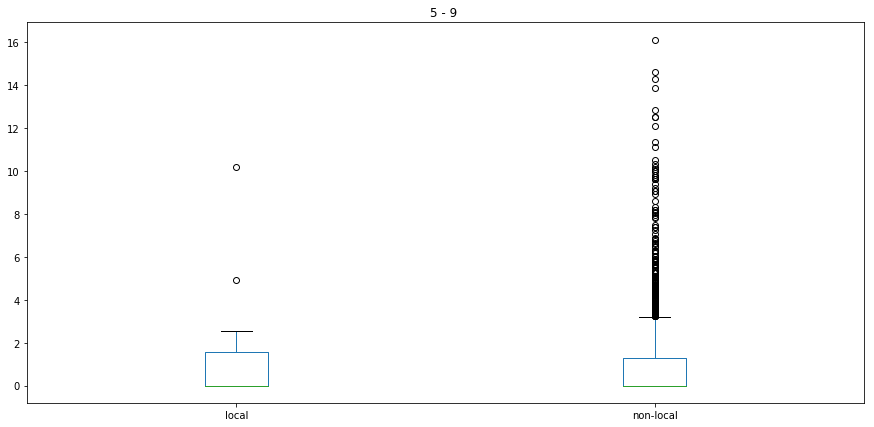

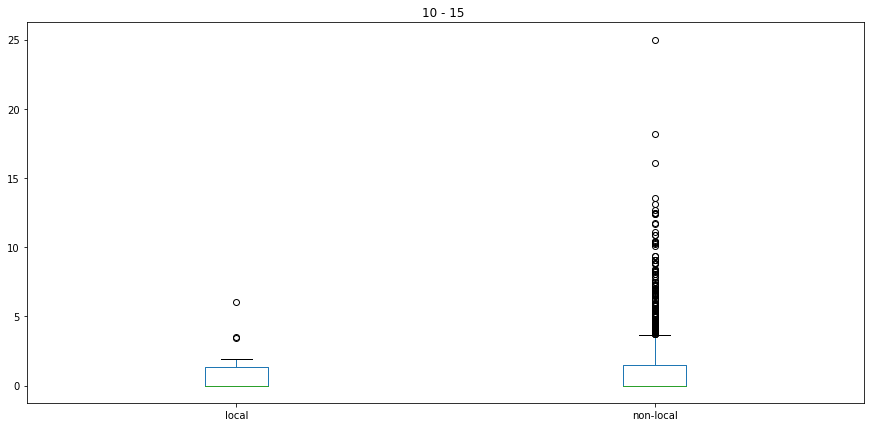

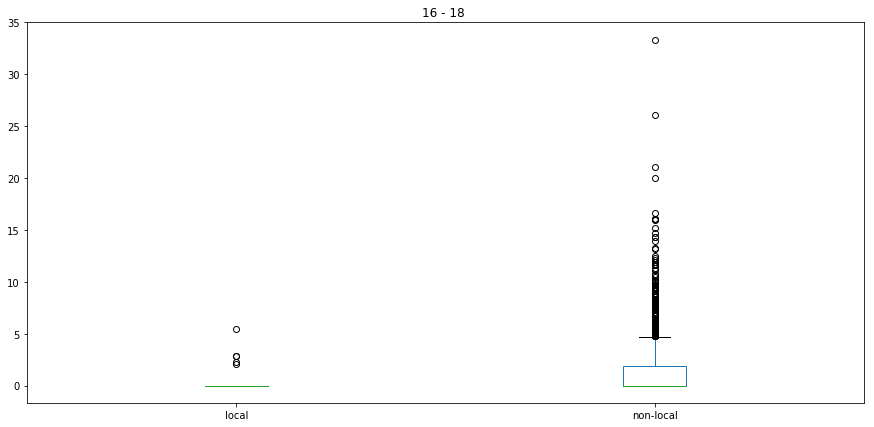

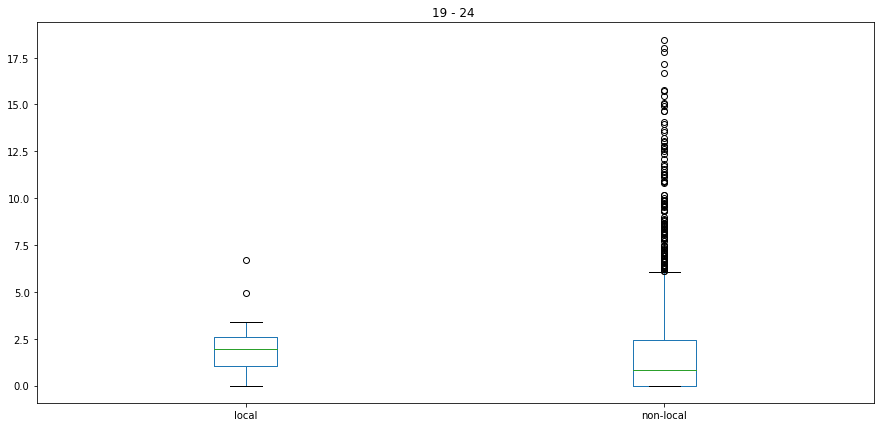

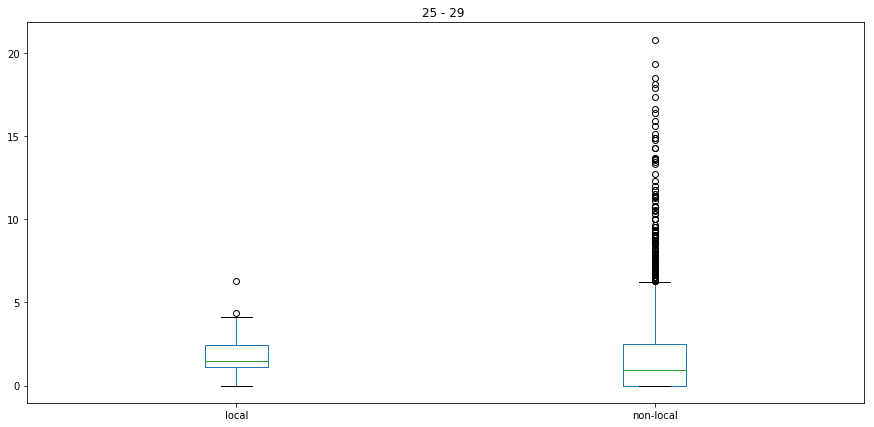

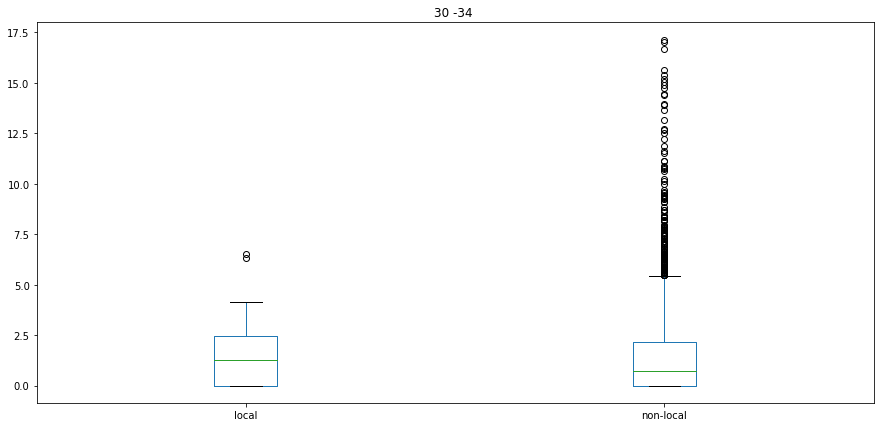

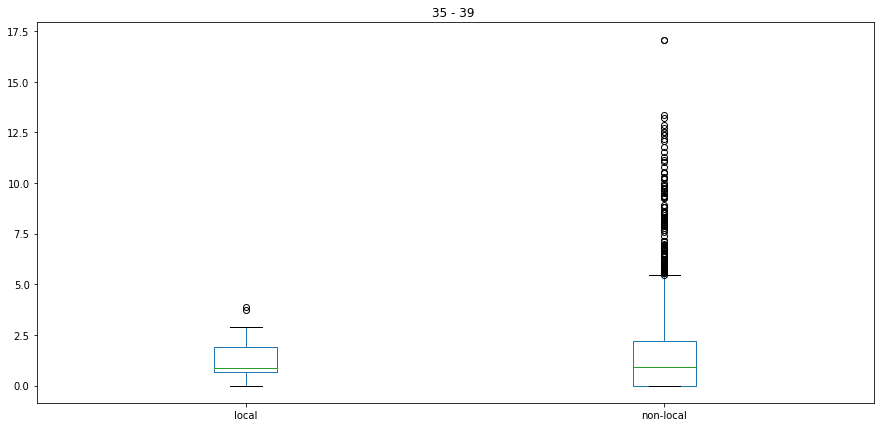

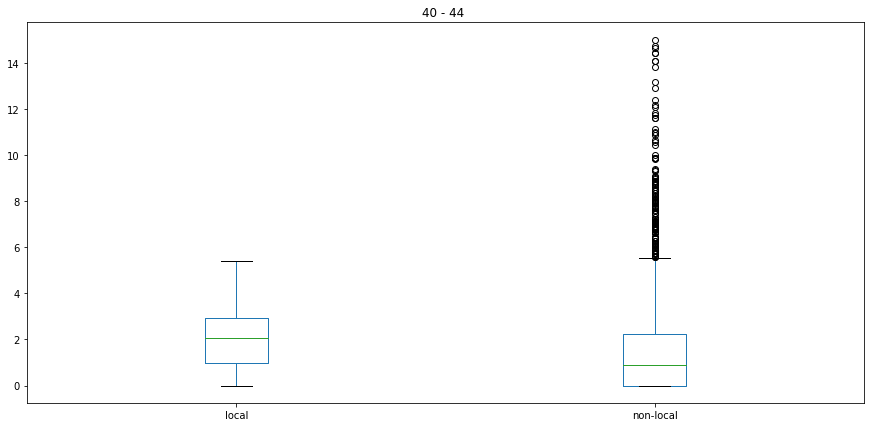

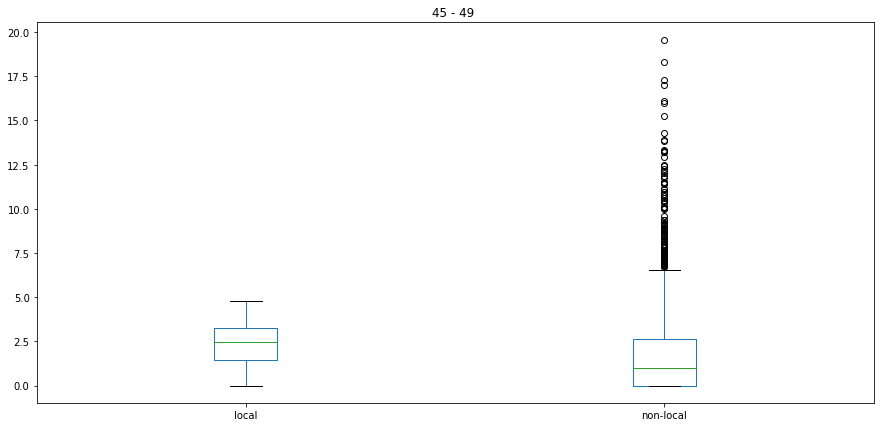

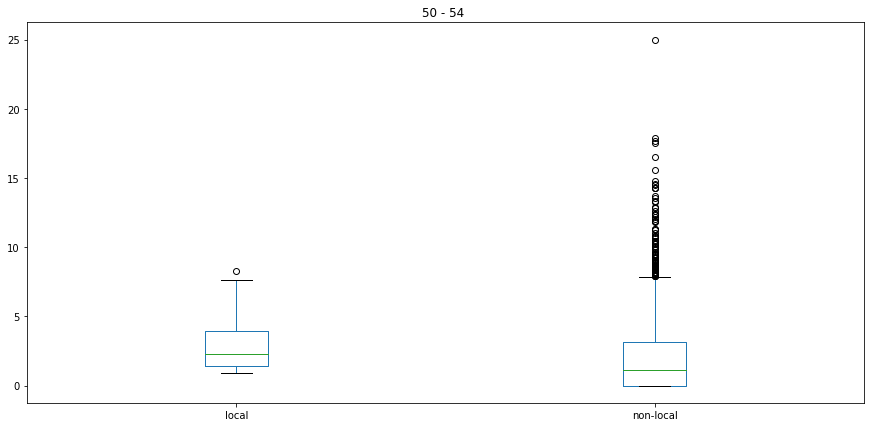

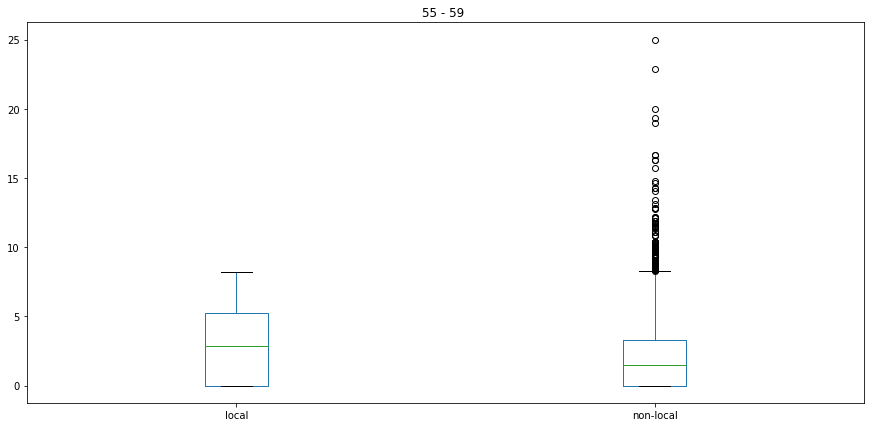

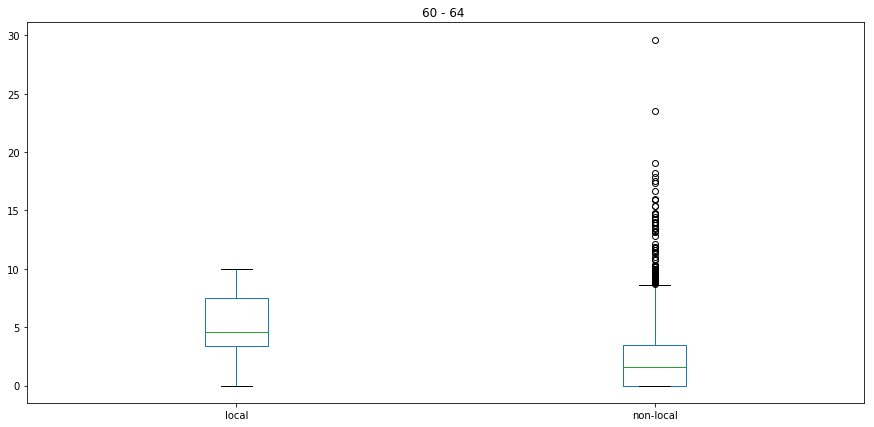

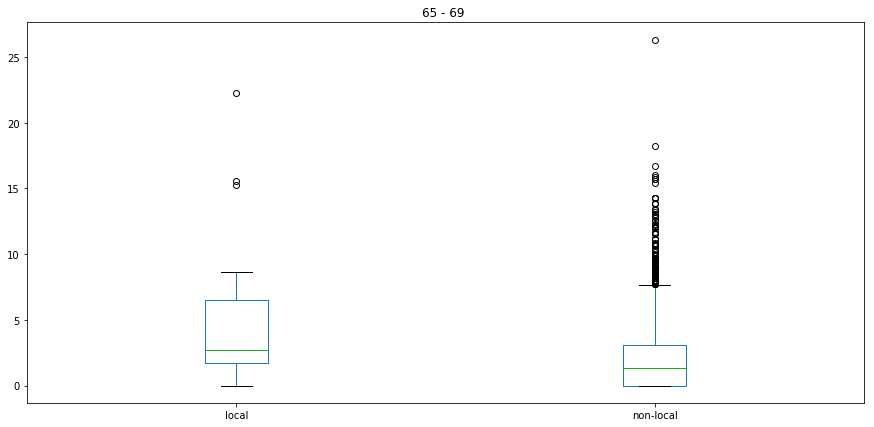

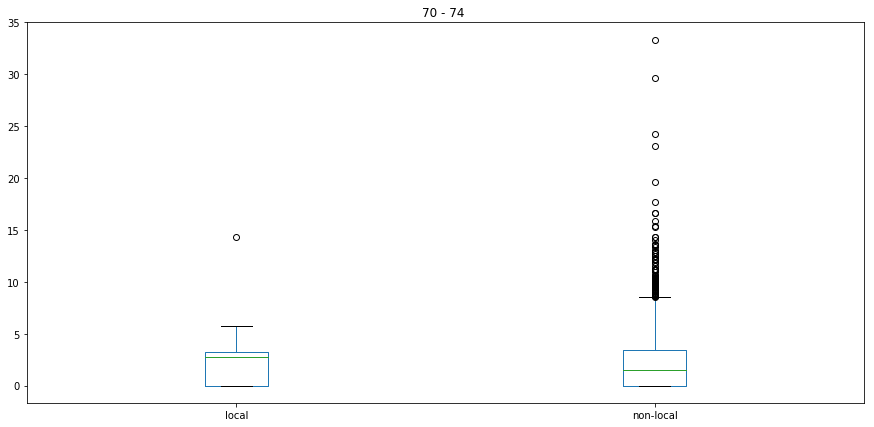

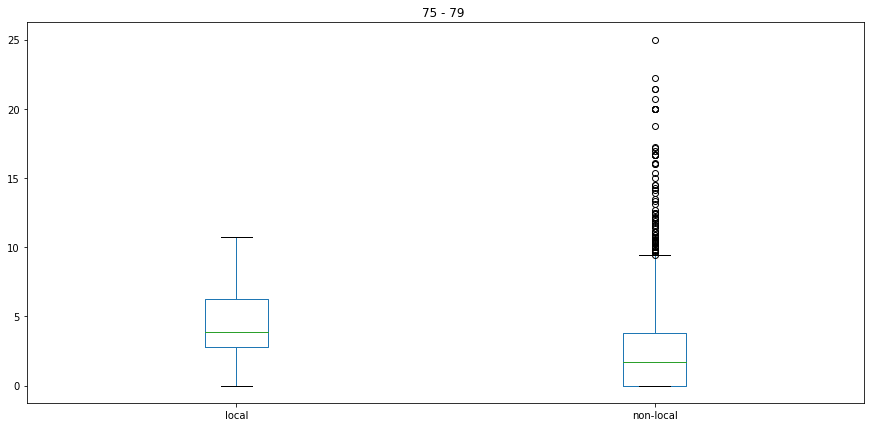

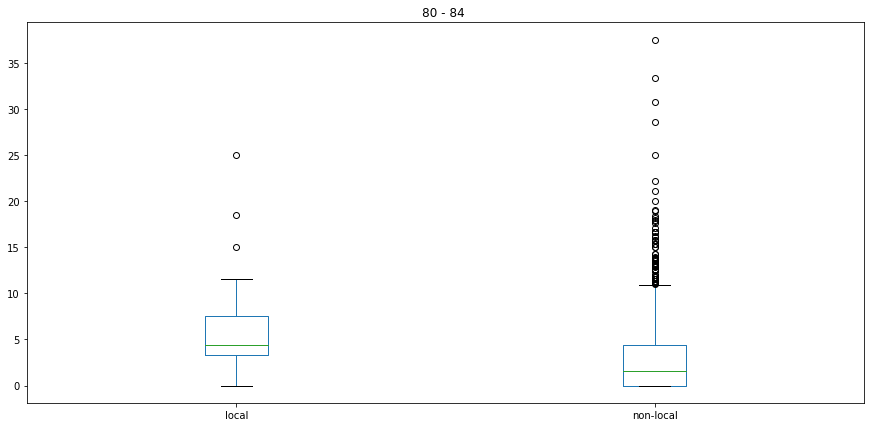

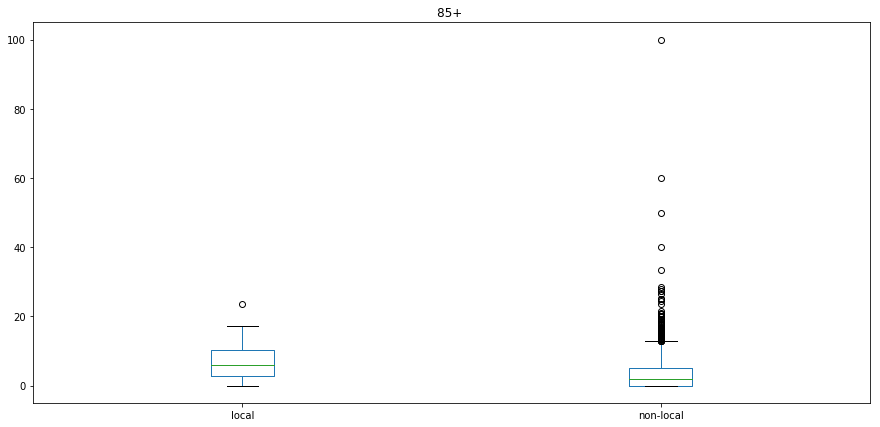

In [9]:
for stat in data.drop(columns=['LSOA name', 'local','0- 15 ', '0 - 18 ', '16 - 64 ', '65+ ']).keys():
    plot_two_data_sets(stat=stat,data=data,kind='box')

We know from age data that there are few older people in the local area. So we multiply the number of people in each age group by the percentage of them that don't have central heating to get an estimate of the number of people without central heating. The age and central heating data come from different sources, so this is only an approximation.

In [10]:
lsoa_name_to_code_dict = np.load("../utilities/name_to_code_dict.npy").item(0)
file = '../age/age.xlsx'
ages = pd.read_excel(file,skiprows=1)
ages = ages.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'])
ages = ages.drop([0,1,2,3])
ages = ages.rename(columns={'Unnamed: 8': 'Total','Unnamed: 4': 'LSOA name'})
ages = ages.rename(columns={'Aged 0 to 15 ': '0- 15 ', 'Aged 16 to 64 ': '16 - 64 ', 'Aged over 65 ': '65+ ',\
                           'Total': 'All Ages '})
ages = ages.dropna()
ages['LSOA name'] =  list(map(lambda lsoa_name : lsoa_name.strip(), ages['LSOA name']))
ages['LSOA name'] =  list(map(lambda lsoa_name : lsoa_name.replace("Rhydfelen Central / Llan ",\
                                                                   "Rhydfelen Central/Ilan "), ages['LSOA name']))
ages['LSOA code'] =  list(map(lambda lsoa_name : lsoa_name_to_code_dict[lsoa_name], ages['LSOA name']))
ages = ages.set_index('LSOA code')
ages = ages.drop(columns=['LSOA name']) 
ages['local'] = list(map(lambda lsoa : int(np.isin(lsoa,lsoa_codes)), ages.index.values))

The age data only uses larger age groups, so we drop the smaller ones, and then make the plots from before but this time for the total number of people without central heating, rather than the percentage.

In [11]:
data_num_ppl = ages/100 * data.drop(columns=['0 - 18 ',' 0 - 4 ', '5 - 9 ', '10 - 15 ', '16 - 18 ', '19 - 24 ', '25 - 29 ',
       '30 -34 ', '35 - 39 ', '40 - 44 ', '45 - 49 ', '50 - 54 ', '55 - 59 ',
       '60 - 64 ', '65 - 69 ', '70 - 74 ', '75 - 79 ', '80 - 84 ', '85+ ','LSOA name'])
data_num_ppl['local']*=100

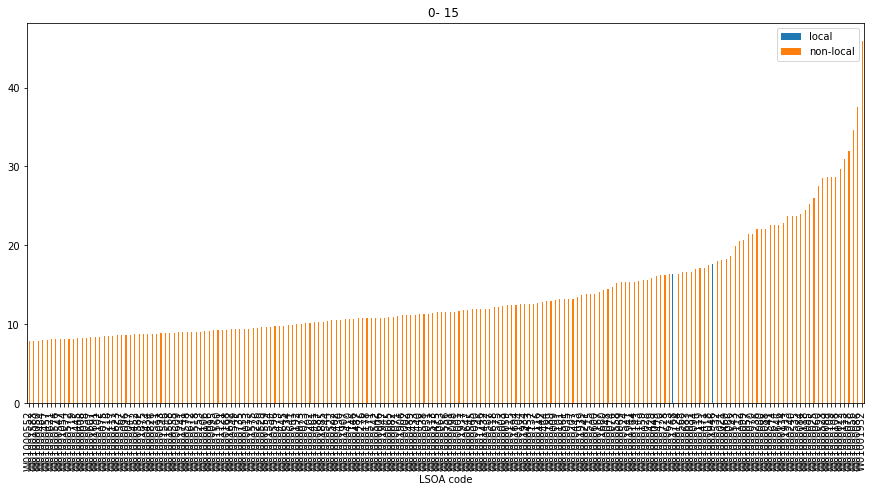

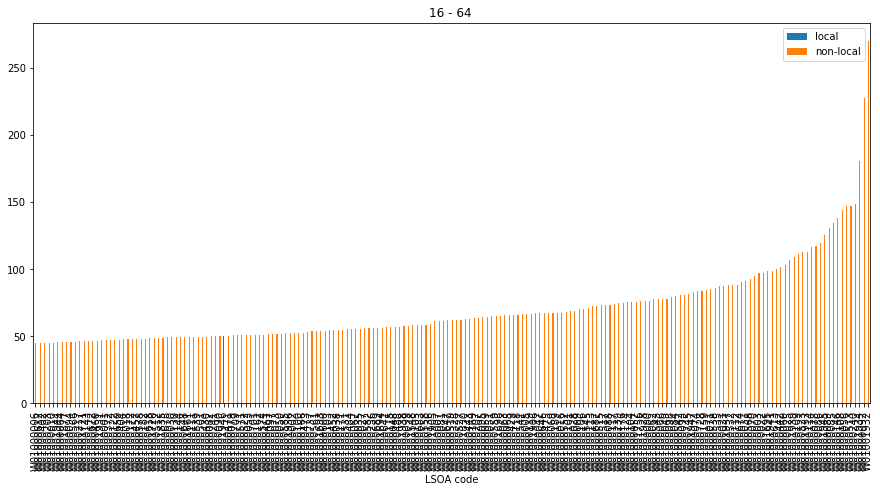

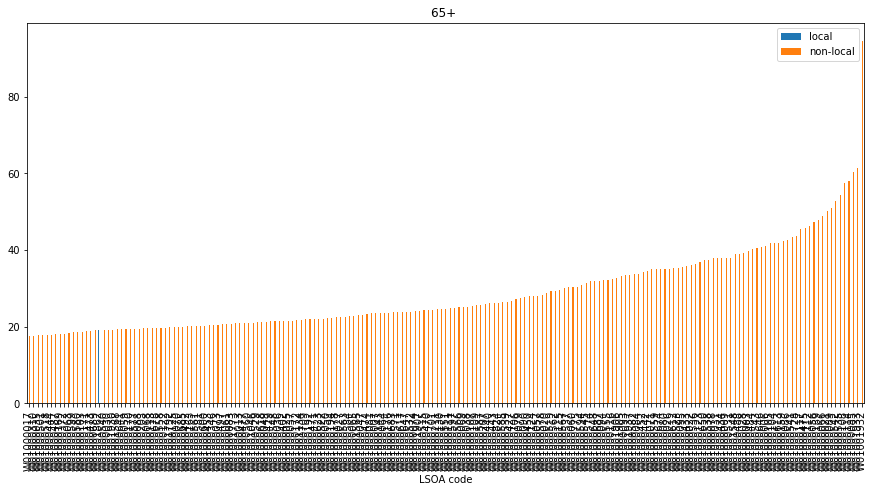

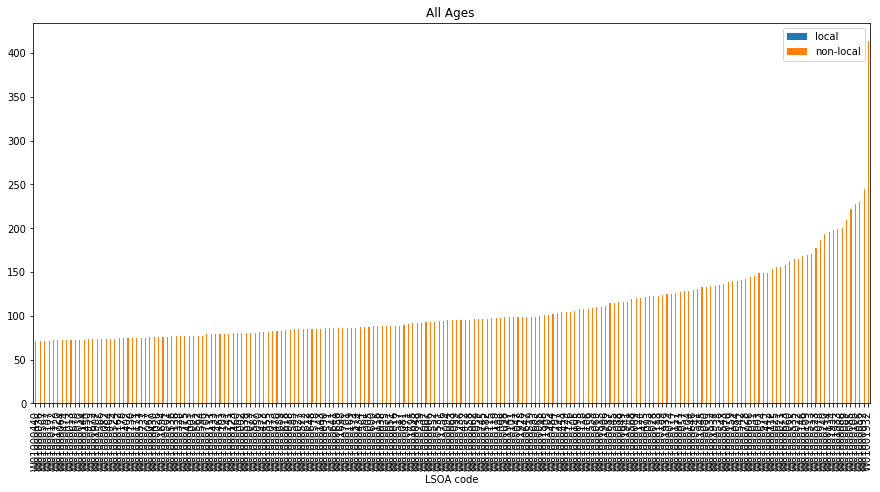

In [12]:
top_10pc_local = {}
for stat in data_num_ppl.drop(columns=['local']).keys():
    top_10pc_local[stat] = plot_two_data_sets(stat=stat,data=data_num_ppl,kind='bar',percentile=10.0)

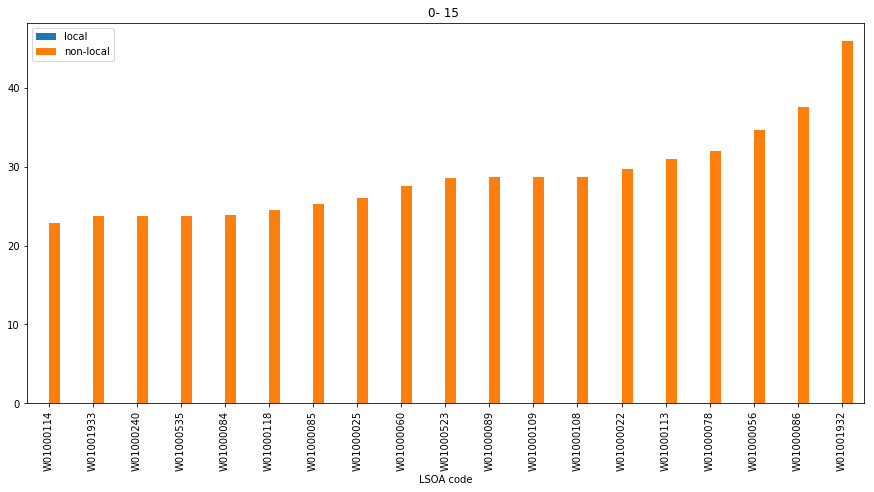

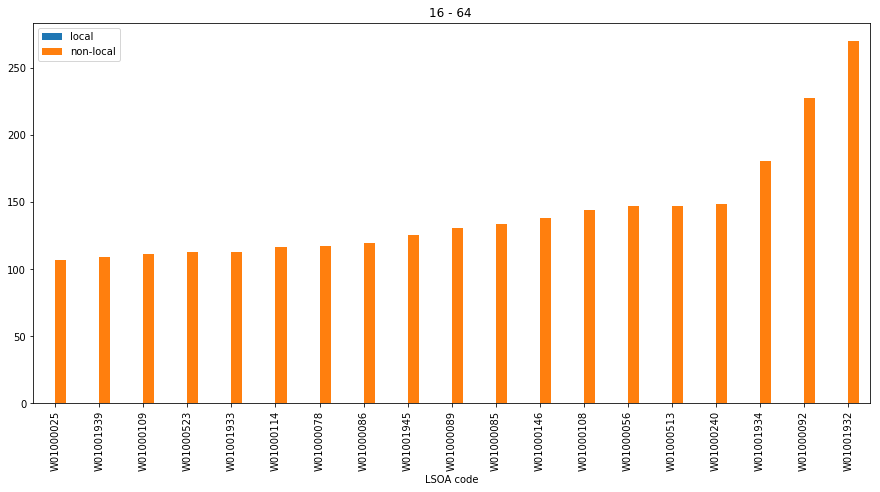

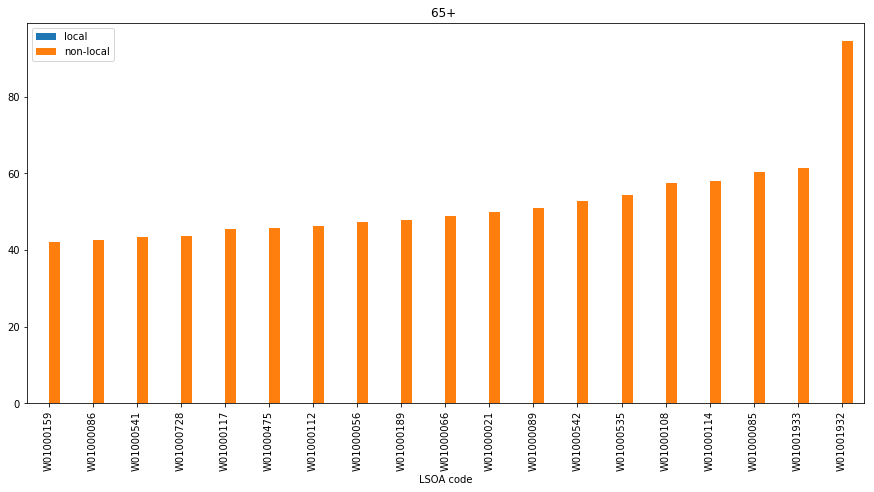

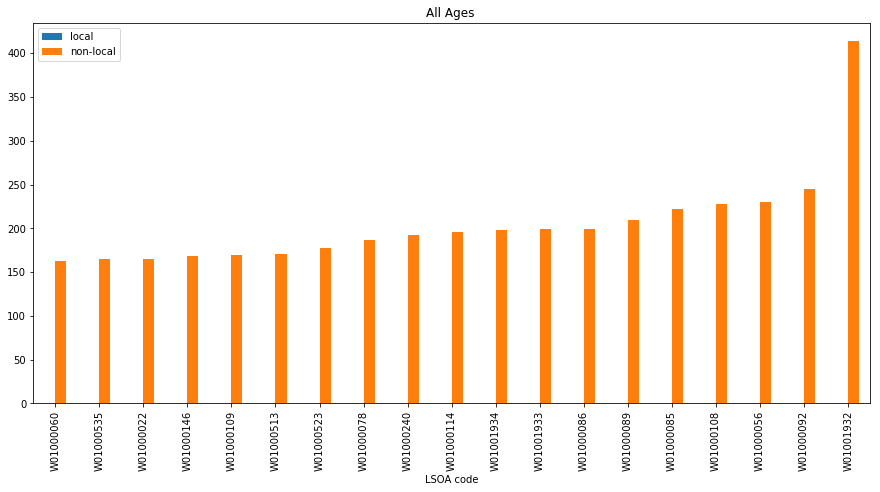

In [13]:
top_1pc_local = {}
for stat in data_num_ppl.drop(columns=['local']).keys():
    top_1pc_local[stat] = plot_two_data_sets(stat=stat,data=data_num_ppl,kind='bar',percentile=1.0)

Below we count the number of local LSOAs in the top decile and percentile of Wales. From this we see that the number of older people without central heating in the local area is not at an extreme.

In [14]:
top_10pc_count = {key : len(top_10pc_local[key]) for key in top_10pc_local.keys()}
top_1pc_count = {key : len(top_1pc_local[key]) for key in top_1pc_local.keys()}
top_10pc_count_df = pd.DataFrame.from_dict(top_10pc_count, orient='index')
top_1pc_count_df = pd.DataFrame.from_dict(top_1pc_count, orient='index')
top_1_10_pc_df = pd.concat([top_10pc_count_df,top_1pc_count_df],axis=1,keys=['10 pc','1 pc'])
top_1_10_pc_df

,10 pc,1 pc
,0,0
0- 15,2,0
16 - 64,1,0
65+,1,0
All Ages,0,0


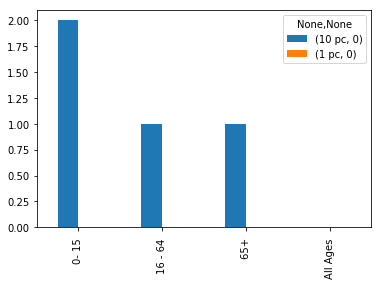

In [15]:
top_1_10_pc_df.plot(kind='bar')

Looking at box plots of the number of people without central heating, we can see that the number of people in the local area without central heating is fairly average for Wales. 

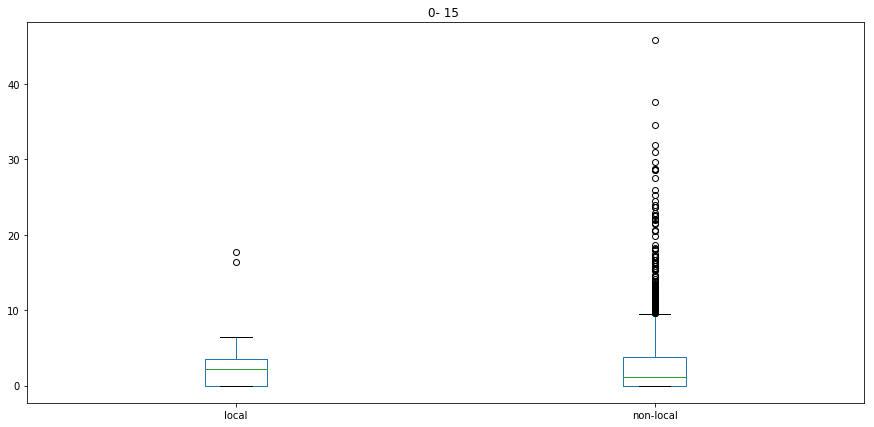

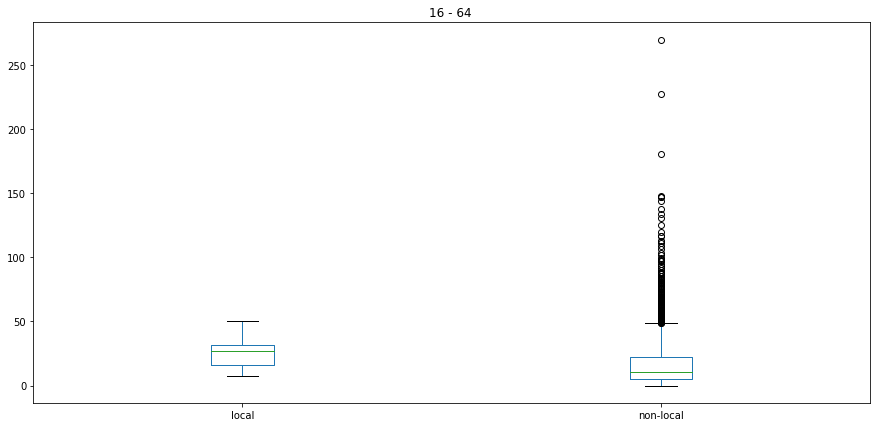

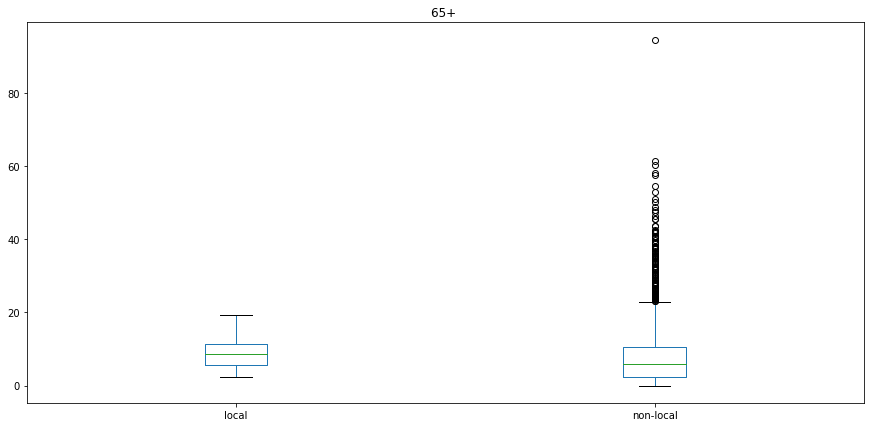

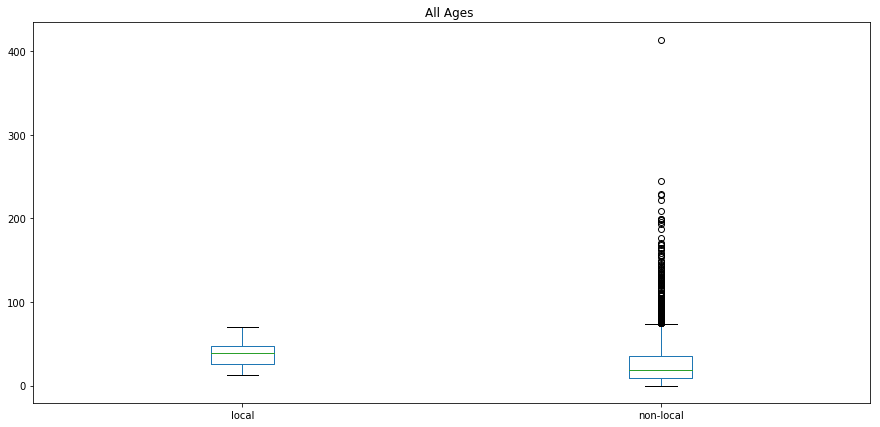

In [16]:
for stat in data_num_ppl.drop(columns=['local']).keys():
    top_1pc_local[stat] = plot_two_data_sets(stat=stat,data=data_num_ppl,kind='box')